**Mat 328 analysis project Milestone 1**

In [2]:
import pandas as pd
import re
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_columns', None)

%matplotlib inline


In [3]:
covid_data = pd.read_csv("country_wise_latest_project.csv")
covid_data.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [4]:
#covid_data.describe(include='all')
#print("1 week % increase")

covid_data.rename(
    columns={"1 week % increase":"1 week percent increase"}
          ,inplace=True)
covid_data.dtypes

Country/Region              object
Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week percent increase    float64
WHO Region                  object
dtype: object

In [5]:
na_Count = covid_data.isna().sum().sum()
inf_filter = covid_data['Deaths / 100 Recovered'] < 10000000000
confirmed_filter = covid_data['Confirmed'] < 25000
covid_data2 = covid_data[inf_filter & confirmed_filter]

print("Amount of NaN values in the whole dataset : " + str(na_Count)) 
covid_data2

Amount of NaN values in the whole dataset : 0


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week percent increase,WHO Region
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


**PLOTS**

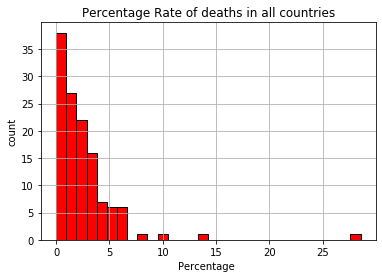

In [6]:
covid_data2['Deaths / 100 Cases'].hist(bins= 30,edgecolor = "black",color= 'red')
plt.title("Percentage Rate of deaths in all countries")
plt.xlabel("Percentage ")
plt.ylabel("count")
plt.savefig('Death_per_100_cases_histogram')

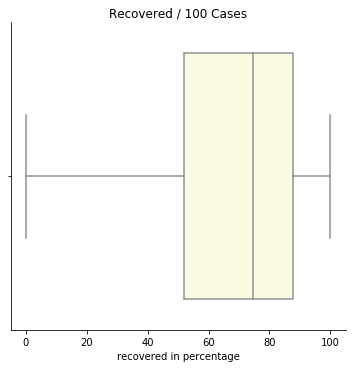

In [19]:
g = sns.catplot(x = "Recovered / 100 Cases" , kind = "box",color='lightyellow', data = covid_data2)
plt.title("Recovered / 100 Cases")
plt.xlabel("recovered in percentage")
g.savefig('Recovered_100_cases_boxplot')

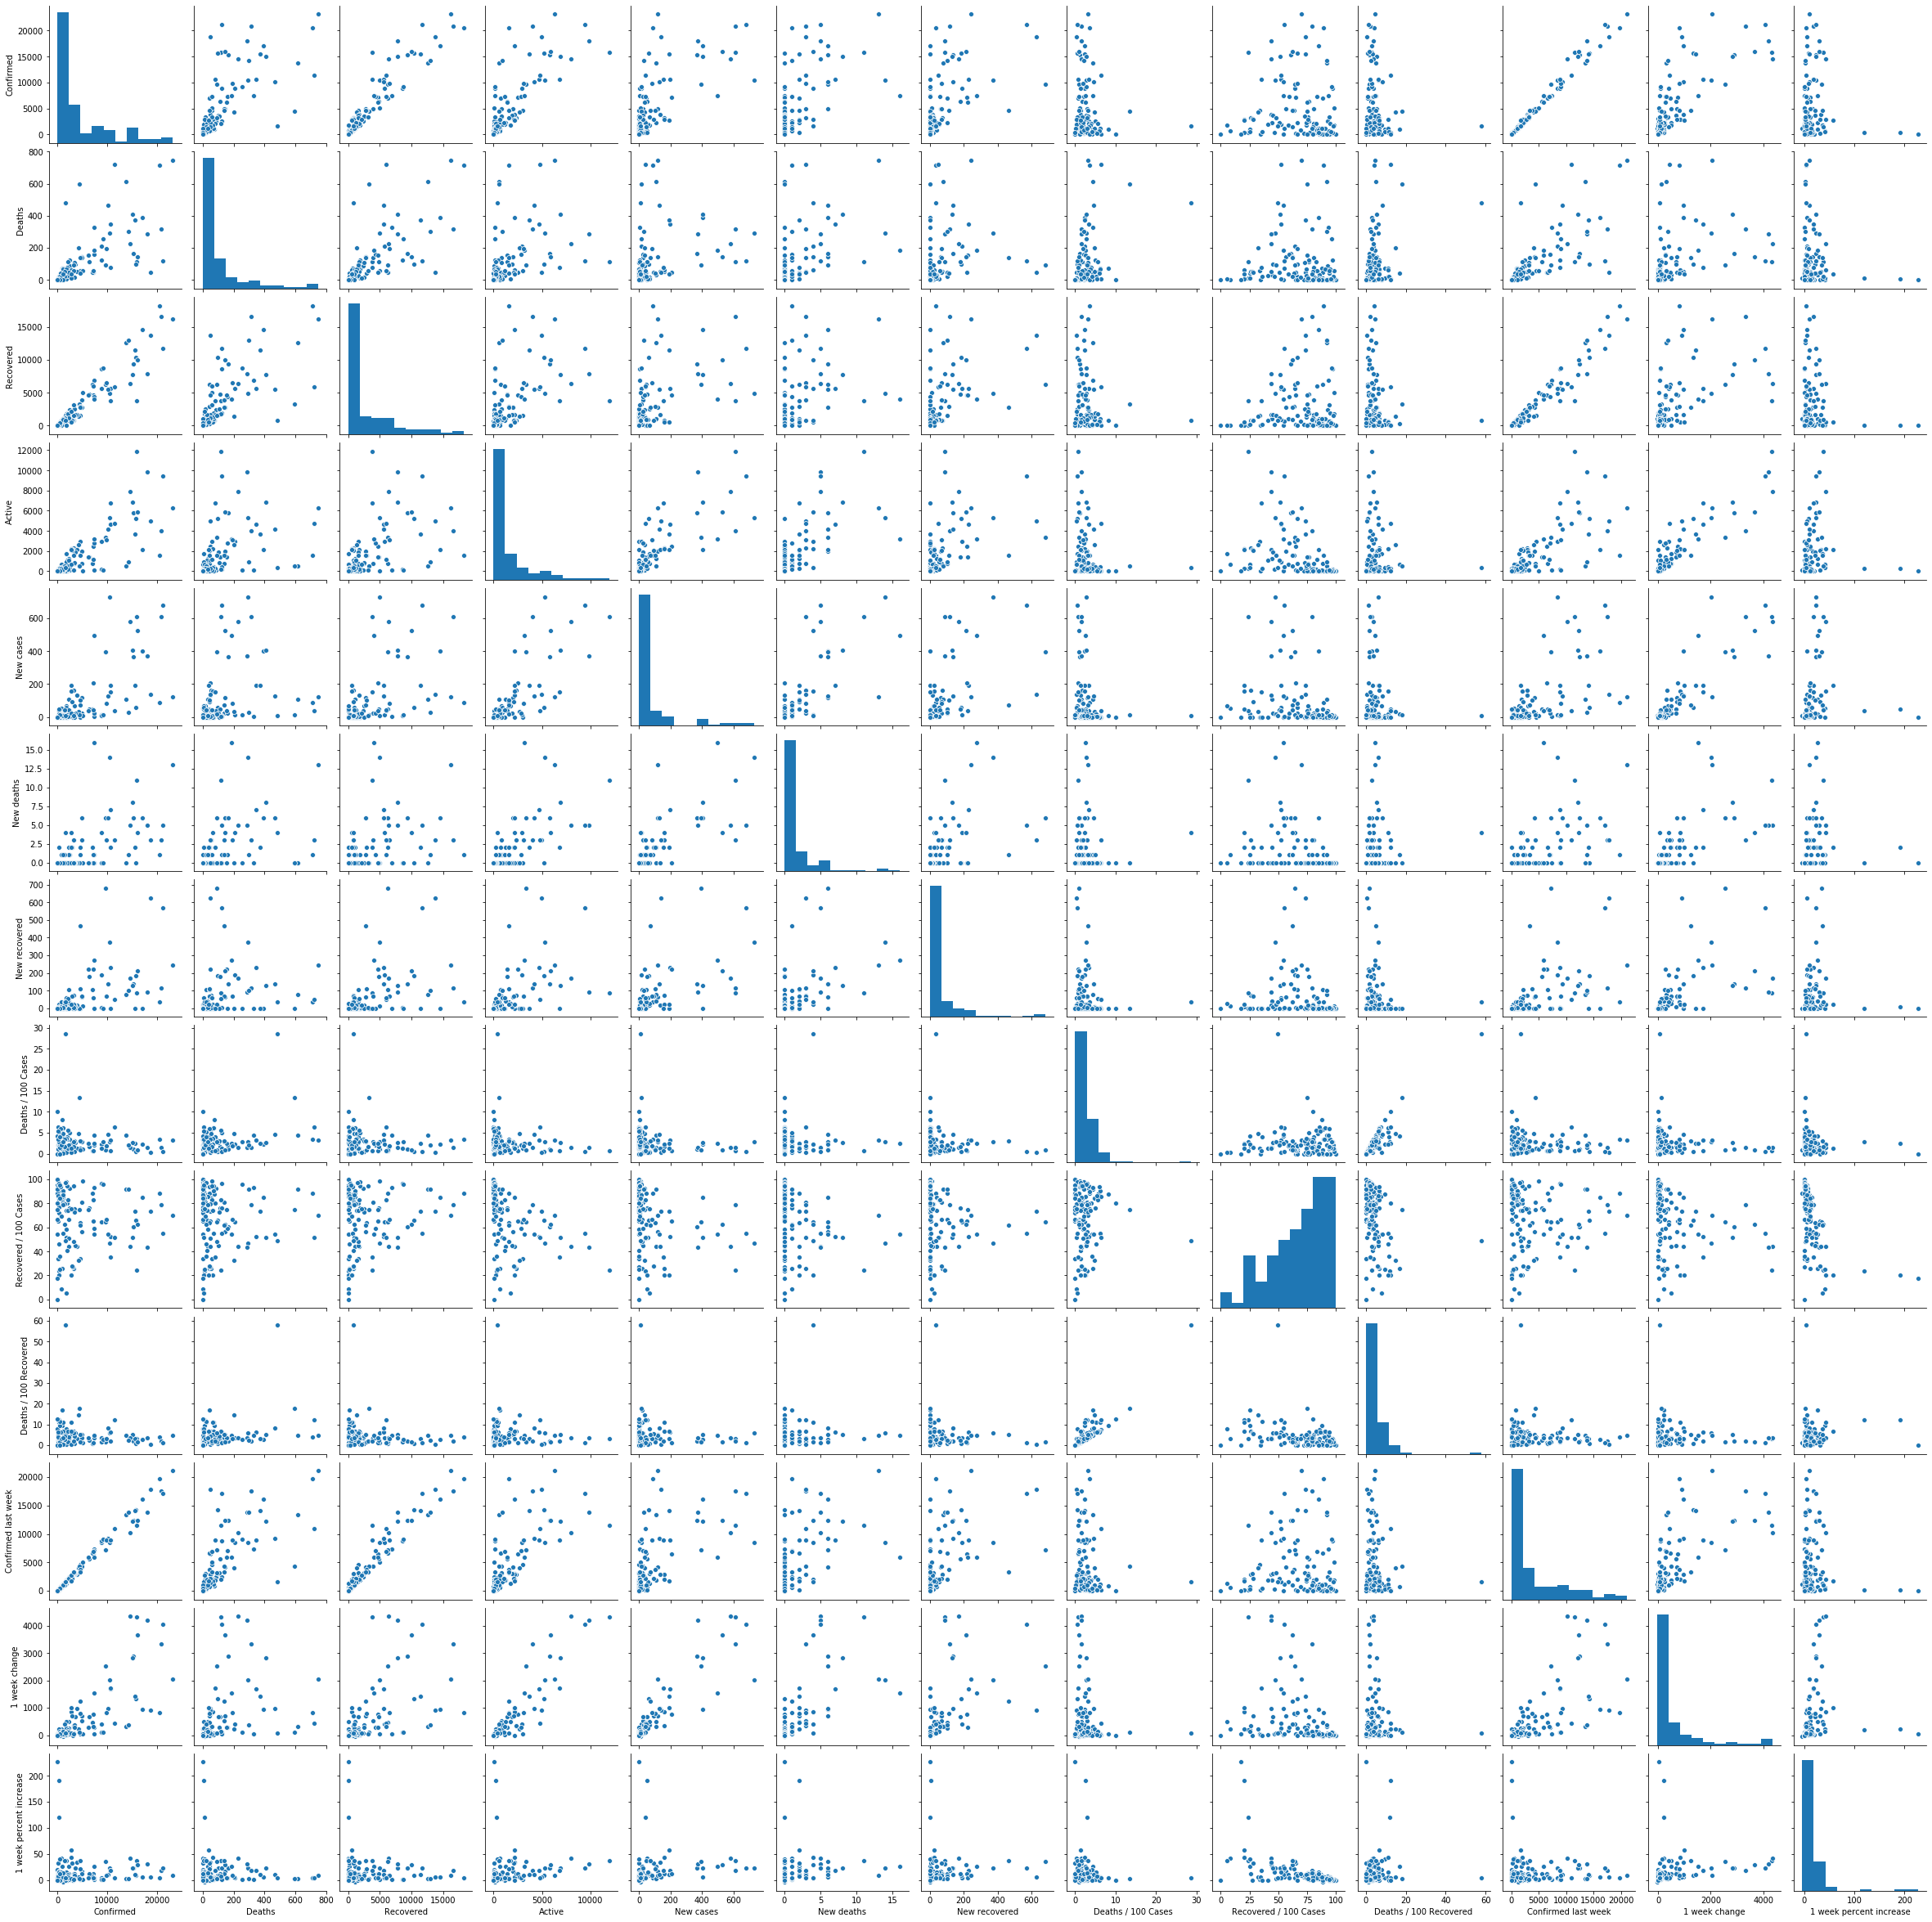

In [11]:
sns.pairplot(data = covid_data2)

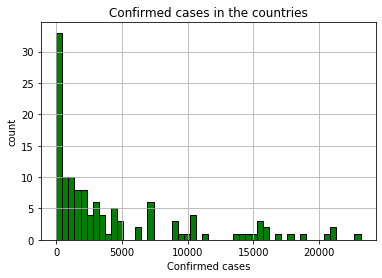

In [18]:
covid_data2['Confirmed'].hist(bins= 50,edgecolor = "black",color= 'green')
plt.title("Confirmed cases in the countries")
plt.xlabel("Confirmed cases")
plt.ylabel("count")
plt.savefig('Confirmed_cases_histogram')

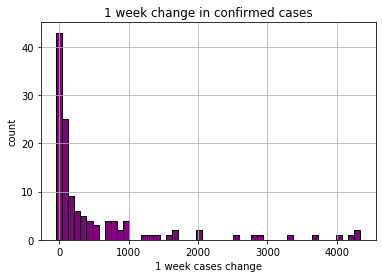

In [6]:
covid_data2['1 week change'].hist(bins= 50,edgecolor = "black",color= 'purple')
plt.title("1 week change in confirmed cases")
plt.xlabel("1 week cases change")
plt.ylabel("count")
plt.savefig('1_week_change')

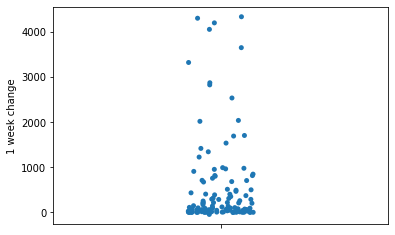

In [7]:
sns.stripplot(y=covid_data2['1 week change'])

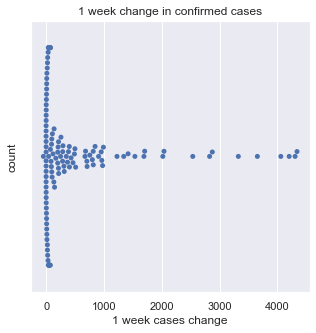

In [5]:
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x=covid_data2['1 week change'])
plt.title("1 week change in confirmed cases")
plt.xlabel("1 week cases change")
plt.ylabel("count")
plt.savefig('1_week_change_swarm_plot')

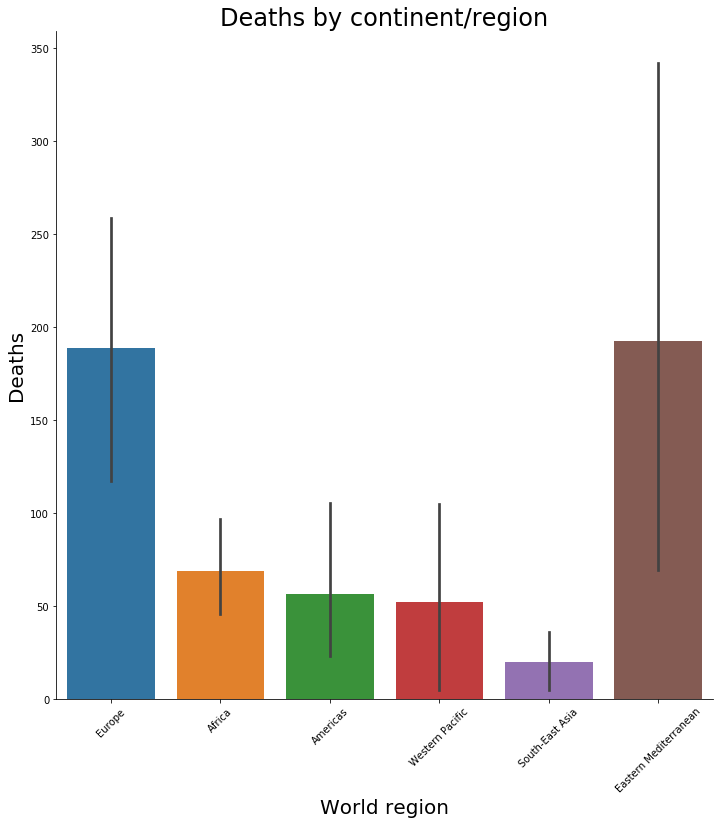

In [9]:
g=sns.catplot(x = "WHO Region", y = "Deaths", kind = "bar", data = covid_data2,height=10, aspect=1)
#sns.set(rc={"figure.figsize":(50,50)})
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
#        ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(rotation=45)
plt.title("Deaths by continent/region", fontsize=24)
plt.xlabel("World region",fontsize=20)
plt.ylabel("Deaths",fontsize=20)
plt.savefig('Deaths_continent_plot')

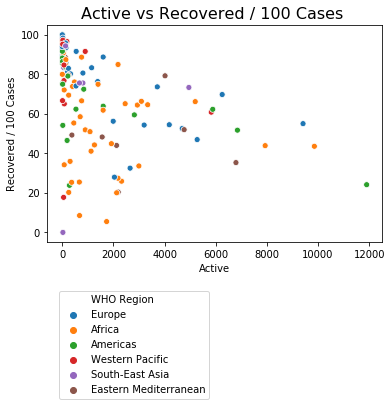

In [12]:
sns.scatterplot(x = "Active", y = "Recovered / 100 Cases",hue = "WHO Region",data = covid_data2)
#plt.xticks(rotation=45)
plt.title("Active vs Recovered / 100 Cases ", fontsize=16)
# plt.xlabel("World region",fontsize=18)
# plt.ylabel("Deaths",fontsize=18)
plt.legend(bbox_to_anchor=(0.5,-0.2))
plt.savefig('Active_Recovered_percentage_plot')

**Milestone 2 machine learning models**

Linear regression model to predict deaths

In [6]:
covid_data_dummies = pd.get_dummies(covid_data2, columns = ["WHO Region"], drop_first = True)
covid_data_dummies.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week percent increase,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,0,0,1,0,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,0,0,1,0,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,0,0,0,0,0
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,1,0,0,0,0
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,0,0,0,0,1


In [30]:
# min_max_scaler = MinMaxScaler()
# covid_data_dummies_label = covid_data_dummies['Deaths']
# covid_data_dummies_features = covid_data_dummies.loc[:, covid_data_dummies.columns != ('Deaths' and 'Country/Region')]
# features_scaled = min_max_scaler.fit_transform(covid_data_dummies_features)
# covid_data_scaled = pd.concat([features_scaled, covid_data_dummies_label],axis = 1)
# covid_data_scaled

In [9]:
lm_covid = smf.ols("Deaths ~ Confirmed + Active + Q('New cases') + Q('WHO Region_Americas') + Q('WHO Region_Eastern Mediterranean') + Q('WHO Region_Europe') + Q('WHO Region_South-East Asia') + Q('WHO Region_Western Pacific') ", data = covid_data_dummies).fit()
lm_covid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     23.69
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           3.04e-21
Time:                        22:50:29   Log-Likelihood:                -755.74
No. Observations:                 126   AIC:                             1529.
Df Residuals:                     117   BIC:                             1555.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.3824     16.769      0.142      0.887     -30.828      35.593
Confirmed                                 0.0267      0.003      9.565      0.000       0.021       0.032
Active                                   -0.0133      0.008     -1.611      0.110      -0.030       0.003
Q('New cases')                           -0.2323      0.099     -2.347      0.021      -0.428      -0.036
Q('WHO Region_Americas')                  5.8844     27.010      0.218      0.828     -47.608      59.376
Q('WHO Region_Eastern Mediterranean')    79.9848     35.697      2.241      0.027       9.289     150.681
Q('WHO Region_Europe')                   67.0367     24.114      2.780      0.006      19.279     114.794
Q('WHO Region_South-East Asia')         -71.4991     41.455     -1.725      0.087    -153.599      10.601
Q('WHO Region_Western Pacific')         -26.8919     33.441     -0.804      0.423     -93.120      39.336
==============================================================================
Omnibus:                       49.468   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.789
Skew:                           1.307   Prob(JB):                     7.57e-46
Kurtosis:                       8.723   Cond. No.                     4.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lm_covid2 = smf.ols("Deaths ~ Confirmed + Q('New cases') + Q('WHO Region_Eastern Mediterranean') + Q('WHO Region_Europe') ", data = covid_data_dummies).fit()
lm_covid2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     45.31
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           3.29e-23
Time:                        22:51:22   Log-Likelihood:                -758.75
No. Observations:                 126   AIC:                             1527.
Df Residuals:                     121   BIC:                             1542.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -7.8171     12.682     -0.616      0.539     -32.925      17.291
Confirmed                                 0.0236      0.002     10.453      0.000       0.019       0.028
Q('New cases')                           -0.3002      0.082     -3.640      0.000      -0.464      -0.137
Q('WHO Region_Eastern Mediterranean')    87.2551     34.328      2.542      0.012      19.294     155.216
Q('WHO Region_Europe')                   81.4758     21.355      3.815      0.000      39.198     123.754
==============================================================================
Omnibus:                       41.224   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.909
Skew:                           1.024   Prob(JB):                     1.91e-40
Kurtosis:                       8.536   Cond. No.                     2.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm_covid3 = smf.ols("Deaths ~ Recovered + Active + Q('New recovered')", data = covid_data_dummies).fit()
lm_covid3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     47.13
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.67e-20
Time:                        19:30:22   Log-Likelihood:                -767.93
No. Observations:                 126   AIC:                             1544.
Df Residuals:                     122   BIC:                             1555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.4466     12.381      1.571      0.119      -5.062      43.955
Recovered              0.0291      0.003      9.613      0.000       0.023       0.035
Active                 0.0089      0.006      1.586      0.115      -0.002       0.020
Q('New recovered')    -0.2669      0.101     -2.631      0.010      -0.468      -0.066
==============================================================================
Omnibus:                       79.047   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.894
Skew:                           2.194   Prob(JB):                     7.36e-94
Kurtosis:                      10.902   Cond. No.                     6.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
lm_covid4 = smf.ols("Deaths ~ Confirmed + Q('New cases') + Q('WHO Region_Eastern Mediterranean') + Q('WHO Region_Europe')", data = covid_data_dummies).fit()
lm_covid4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     45.31
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.29e-23
Time:                        20:26:03   Log-Likelihood:                -758.75
No. Observations:                 126   AIC:                             1527.
Df Residuals:                     121   BIC:                             1542.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -7.8171     12.682     -0.616      0.539     -32.925      17.291
Confirmed                                 0.0236      0.002     10.453      0.000       0.019       0.028
Q('New cases')                           -0.3002      0.082     -3.640      0.000      -0.464      -0.137
Q('WHO Region_Eastern Mediterranean')    87.2551     34.328      2.542      0.012      19.294     155.216
Q('WHO Region_Europe')                   81.4758     21.355      3.815      0.000      39.198     123.754
==============================================================================
Omnibus:                       41.224   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.909
Skew:                           1.024   Prob(JB):                     1.91e-40
Kurtosis:                       8.536   Cond. No.                     2.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

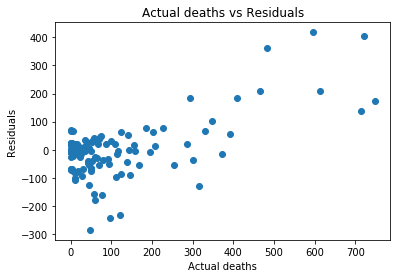

In [17]:
plt.scatter(x = covid_data_dummies['Deaths'], y = lm_covid.resid)
plt.title("Actual deaths vs Residuals")
plt.xlabel("Actual deaths")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

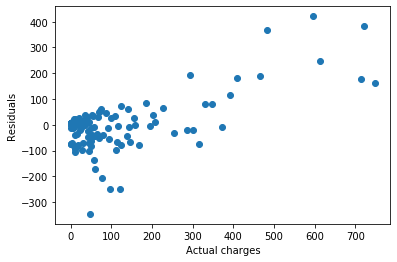

In [15]:
plt.scatter(x = covid_data_dummies['Deaths'], y = lm_covid2.resid)
plt.xlabel("Actual charges")
plt.ylabel("Residuals")

K-nearest Neighbor model 

In [31]:
x = covid_data_dummies[['Confirmed','Recovered','Active']]
x

,Confirmed,Recovered,Active
1,4880,2745,1991
3,907,803,52
4,950,242,667
5,86,65,18
8,15303,9311,5825
...,...,...,...
182,10621,3752,6791
183,10,8,1
184,1691,833,375
185,4552,2815,1597


In [32]:
y = covid_data_dummies["Deaths"]
y

1      144
3       52
4       41
5        3
8      167
      ... 
182     78
183      1
184    483
185    140
186     36
Name: Deaths, Length: 126, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [34]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [41]:
mses_test_scaled = []
mses_train_scaled = []
for i in range(1,21,1):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)
    y_test_pred = knn.predict(x_test_scaled)
    y_train_pred = knn.predict(x_train_scaled)
    mses_test_scaled.append(mean_squared_error(y_test_pred, y_test))
    mses_train_scaled.append(mean_squared_error(y_train_pred, y_train))
    
    print("MSE for test data at k = ",i," ",mean_squared_error(y_test_pred, y_test))
    print("MSE for train data at k = ",i," ",mean_squared_error(y_train_pred, y_train))
    print("\n")

MSE for test data at k =  1   39079.03846153846
MSE for train data at k =  1   0.0


MSE for test data at k =  2   31436.89423076923
MSE for train data at k =  2   4132.38


MSE for test data at k =  3   33536.29487179488
MSE for train data at k =  3   5607.48


MSE for test data at k =  4   30103.03125
MSE for train data at k =  4   7109.2525


MSE for test data at k =  5   28202.990769230764
MSE for train data at k =  5   7810.996399999999


MSE for test data at k =  6   23404.956196581195
MSE for train data at k =  6   8500.304999999998


MSE for test data at k =  7   23064.33437990581
MSE for train data at k =  7   9503.764285714286


MSE for test data at k =  8   21655.92548076923
MSE for train data at k =  8   9309.3946875


MSE for test data at k =  9   20350.35375118708
MSE for train data at k =  9   9703.093580246914


MSE for test data at k =  10   20996.46076923077
MSE for train data at k =  10   10296.060199999998


MSE for test data at k =  11   19948.627463445646
MSE for 

Text(0.5, 1.0, 'MSE for different numbers of neighbors on test split')

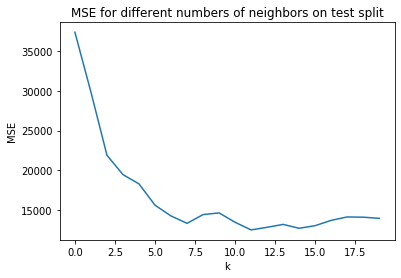

In [44]:

plt.plot(mses_test_scaled)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors on test split")

Text(0.5, 1.0, 'MSE for different numbers of neighbors on train split')

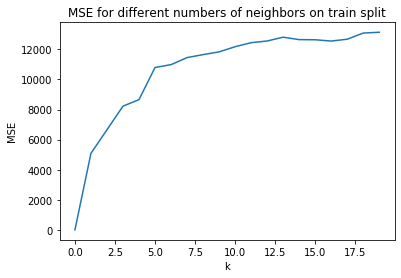

In [45]:
plt.plot(mses_train_scaled)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors on train split")

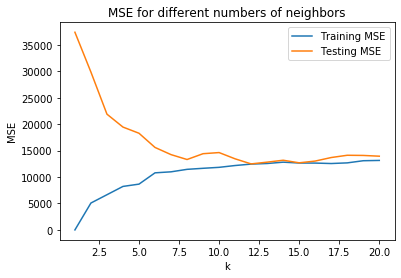

In [52]:
xx = np.linspace(1,20,20)
plt.plot(xx,pd.Series(mses_train_scaled))
plt.plot(xx,pd.Series(mses_test_scaled))
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")
plt.legend(["Training MSE","Testing MSE"])

at k = 7 seems to work best for the model 

In [44]:
knn2 = KNeighborsRegressor(n_neighbors = 7)
knn2.fit(x_train_scaled, y_train)
y_test_pred2 = knn2.predict(x_test_scaled)
y_train_pred2 = knn2.predict(x_train_scaled)
   

AttributeError: 'KNeighborsRegressor' object has no attribute 'summary'